In [126]:
import json
import numpy as np
from matplotlib import pyplot as plt

# Scanned/digitized from Fig 13 of https://arxiv.org/pdf/1805.12028.pdf
with open('./MBData/mB_numu_new.json','r', encoding='utf-8') as json_data:
    dn = json.load(json_data)
    json_data.close()
    
    
with open('./MBData/mB_numu_old.json','r', encoding='utf-8') as json_data:
    do = json.load(json_data)
    json_data.close()

In [127]:
from pprint import pprint
#pprint(d)


new data shape: (83, 2)
old data shape: (87, 2)
After padding/trimming, new data shape: (83, 2)
After padding/trimming, old data shape: (83, 2)


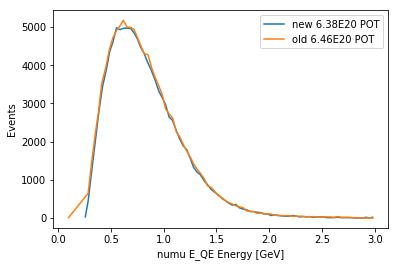

In [129]:
scannedValsNew = np.array([x['value'] for x in dn['datasetColl'][0]['data']])
print ("new data shape: " + str(scannedValsNew.shape))

scannedValsOld = np.array([x['value'] for x in do['datasetColl'][0]['data']])
print ("old data shape: " + str(scannedValsOld.shape))

#scannedValsOld[0:4,1] = 0 # this is a scan glitch, y-axis has value 0 for both
# when I scanned new data I just skipped over first 4 values. So, let's zero them.
#scannedValsNew = np.insert(scannedValsNew, obj=0, values=scannedValsOld[0:4,],axis=0)
# Or, in fact, drop the extra first 4 of Old
scannedValsOld = scannedValsOld[4:,]

print ("After padding/trimming, new data shape: " + str(scannedValsNew.shape))
print ("After padding/trimming, old data shape: " + str(scannedValsOld.shape))

#print(scannedValsNew)
plt.plot(scannedValsNew[:,0],scannedValsNew[:,1],label='new 6.38E20 POT')
plt.plot(scannedValsOld[:,0],scannedValsOld[:,1],label='old 6.46E20 POT')
plt.xlabel('numu E_QE Energy [GeV]')
plt.ylabel('Events')
plt.legend()
#plt.show()


scannedValsOld[0:4,]

In [136]:
MBMuons=np.loadtxt("MBData/miniboone_numudata.txt")
MBBinEdges=np.loadtxt("MBData/miniboone_binboundaries_nue_lowe.txt")

In [139]:
MBBinEdges


array([  200.,   300.,   375.,   475.,   550.,   675.,   800.,   950.,
        1100.,  1300.,  1500.,  3000.])

(0.2, 3.0)

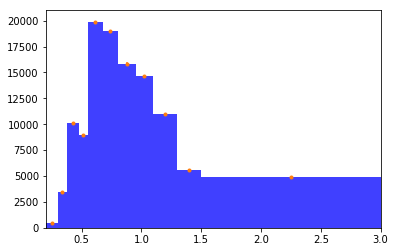

In [183]:
counts,bins = np.histogram(scannedValsNew[:,0],bins=MBBinEdges/1000.,weights=scannedValsNew[:,1])
countsold,_ = np.histogram(scannedValsOld[:,0],bins=MBBinEdges/1000.,weights=scannedValsOld[:,1])

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.clf()
plt.hist(scannedValsNew[:,0],bins=MBBinEdges/1000.,facecolor='b', alpha=0.75, weights=scannedValsNew[:,1])
plt.errorbar(bincenters, counts, 1*np.sqrt(counts), None, fmt=".")
plt.xlim((0.2,3.0))

In [189]:
# Would like to check my binned, scanned data with what we'd used in first paper. But What I'm getting
# here in our repo is only above-500 MeV data apparently. I'm missing 3 bins. So, currently confused
# on what we downloaded from mB data site.

print(str(MBMuons))
print(str(np.array(countsold,dtype='int')))


[ 19189.  29943.  26748.  18692.  11123.   5830.   2674.   1273.]
[  644  3676 10316  9119 20121 19128 16187 14929 11049  5775  5103]
